# 🧠 Breast Cancer Classification Using Machine Learning
This project uses the Breast Cancer dataset from Kaggle to build a complete machine learning pipeline for medical diagnosis. It explores and compares various classification algorithms. The goal is to find the most effective model for early and accurate breast cancer detection.
# 🔍 Introduction
Breast cancer is one of the most common and life-threatening diseases affecting women worldwide. Early and accurate diagnosis plays a major role in improving treatment outcomes and survival rates.

This dataset contains features derived from digitized images of fine needle aspirate (FNA) of breast masses. The features describe characteristics of the cell nuclei present in the images — like texture, radius, perimeter, smoothness, and concavity. Each instance in the dataset is labeled as either benign (non-cancerous) or malignant (cancerous).
# 🎯 Objective
The main goal of this project is to develop and compare the performance of different supervised machine learning algorithms to correctly classify breast tumors as benign or malignant.

The models used in this project are:

a) Logistic Regression

b) Support Vector Machine (SVM)

c) K-Nearest Neighbors (KNN)

d) Naive Bayes

e) Decision Tree

f) Random Forest
# 📏 Evaluation Metrics
We assess each model's performance using:

a) Accuracy

b) Precision

c) Recall

d) F1 Score

e) Confusion Matrix
# 🧭 Goal of the Project
The aim is to build and test several classification models on the Breast Cancer Wisconsin dataset to find out which one gives the highest accuracy and reliability. This can help support early detection and better decision-making in breast cancer diagnosis.

# Classification

# Logistic Regression

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix 

In [4]:
data = pd.read_csv("C:/Users/durgarao/OneDrive/Desktop/data science in machine learning/breast_cancer_dataset.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
data.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

# 🔠 Label Encoding for Diagnosis Column

In [7]:
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()
data['diagnosis'] = l.fit_transform(data['diagnosis'])
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# 🧪 Splitting Features and Target Variable

In [8]:
x = data.iloc[:,2:-1]
y = data.iloc[:,[1]]

In [9]:
print(x.shape)
print(y.shape)

(569, 30)
(569, 1)


# 📊 Visualizing Diagnosis Distribution

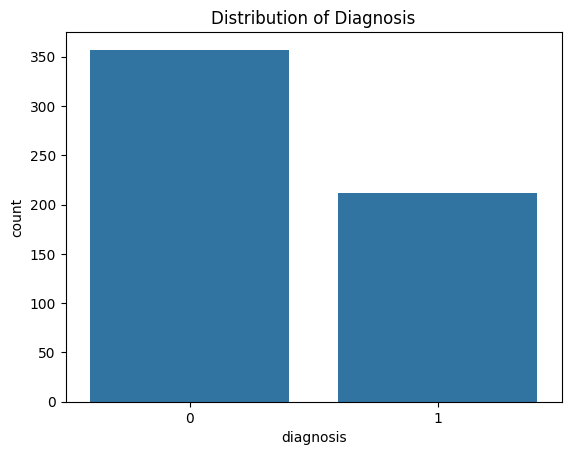

In [10]:
sns.countplot(x = 'diagnosis', data = data)
plt.title('Distribution of Diagnosis')
plt.show()

# 🧠 What This Graph Tells Us:
    
    In the graph above:

        0 means the person does NOT have cancer (Benign).

        1 means the person DOES have cancer (Malignant).

    ✅ Majority of the people are not suffering from cancer.

    ⚠️ Fewer people are diagnosed with malignant tumors.

# 📈 Histogram of Radius Mean (Based on Diagnosis)

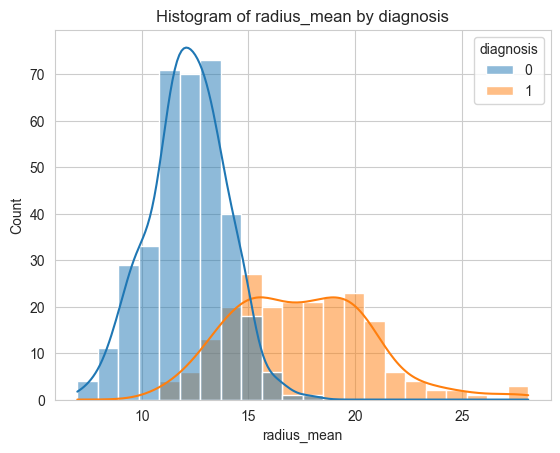

In [11]:
sns.set_style('whitegrid')
sns.histplot(data = data, x = 'radius_mean', hue = 'diagnosis', kde = True)
plt.title("Histogram of radius_mean by diagnosis")
plt.show()

radius_mean represents the average radius of the cell nuclei in the tumor.

hue='diagnosis' lets us split the histogram by diagnosis (0 or 1).

kde=True draws a smooth curve (Kernel Density Estimate) to show the shape of the distribution.

# 📊 What the Graph Tells Us

The blue area (0) shows the distribution of benign tumors.

The orange/red area (1) shows the distribution of malignant tumors.

Most benign tumors have smaller radius values.

Malignant tumors are more likely to have larger radius values.



# 🧪 Histograms of All Features

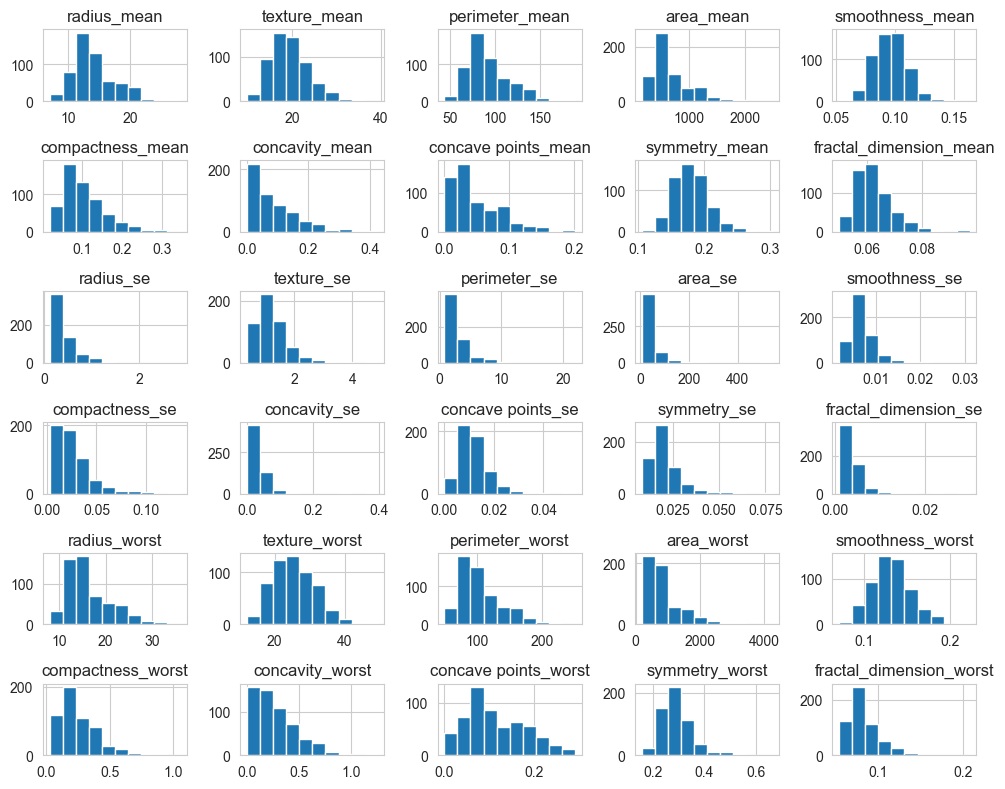

In [12]:
data.iloc[:, 2: -1].hist(figsize = (10, 8))
plt.tight_layout()
plt.show()

You can spot which features are skewed, normally distributed, or have outliers.

This helps in deciding:

Whether to apply scaling or transformation.

If some features need normalization or log conversion.



# 📊 Feature Distribution and Diagnosis Comparison

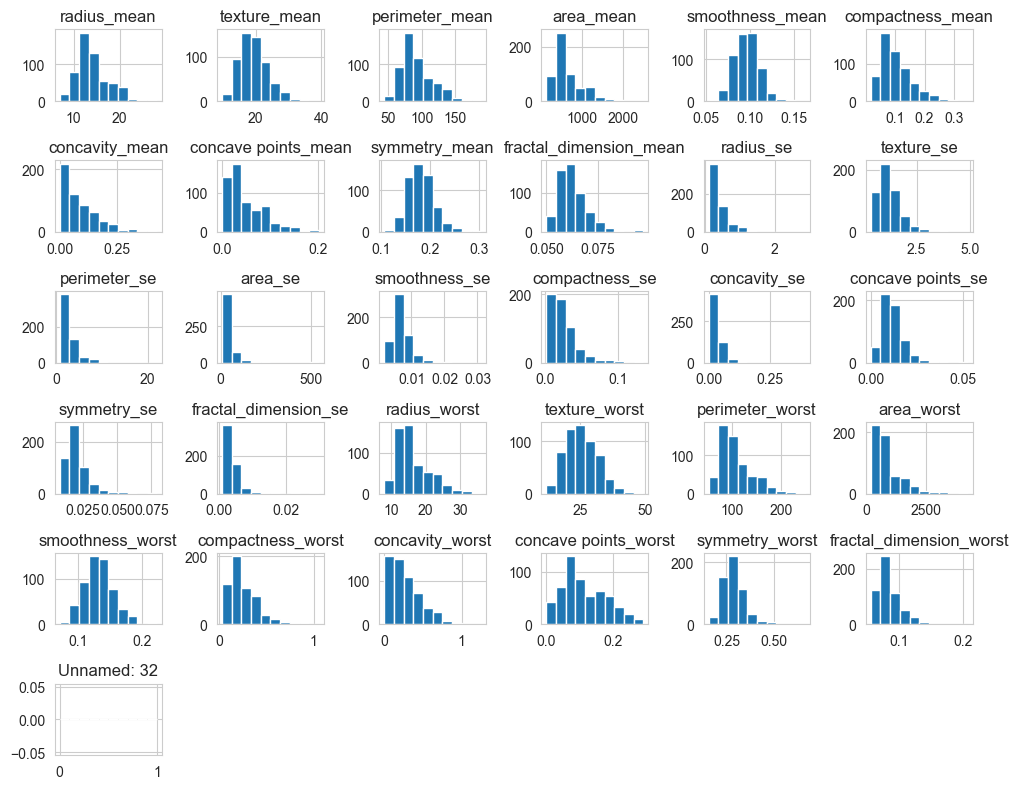

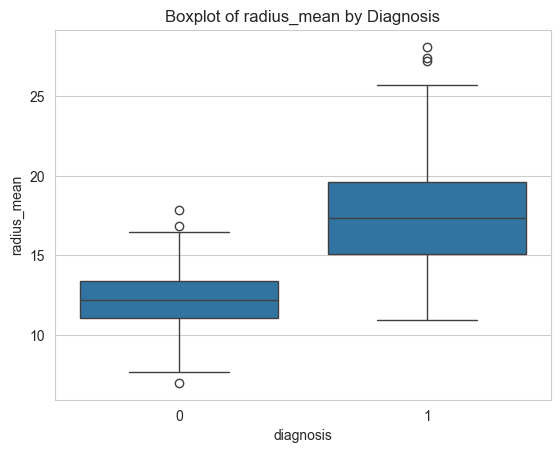

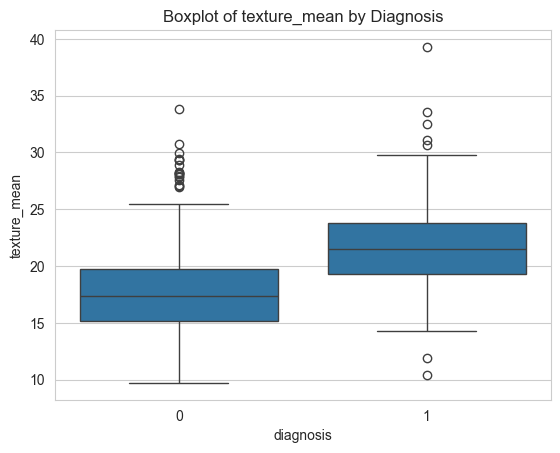

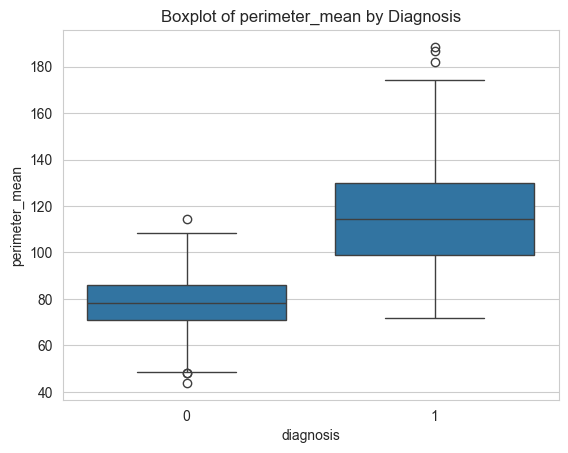

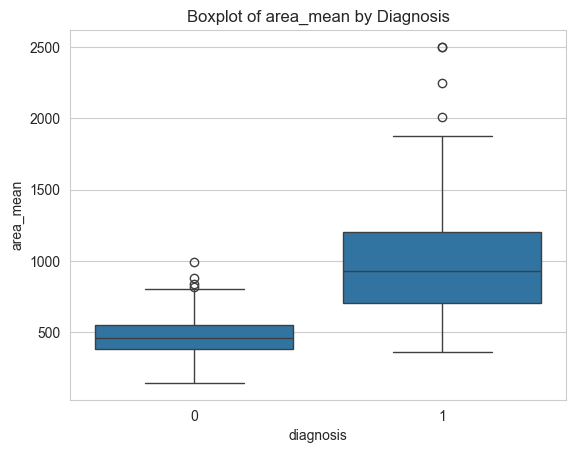

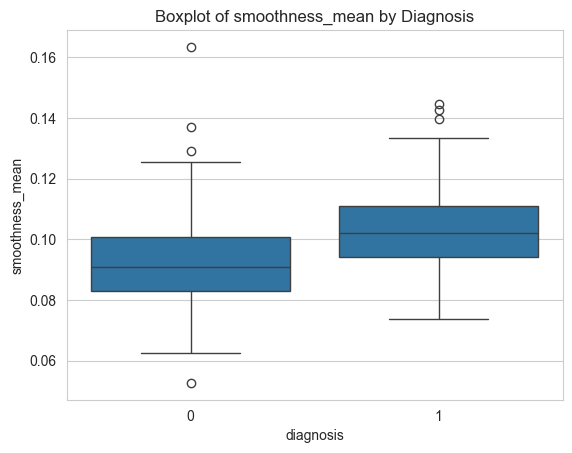

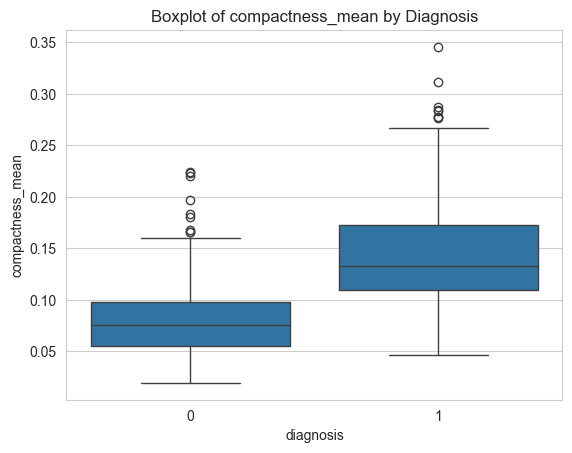

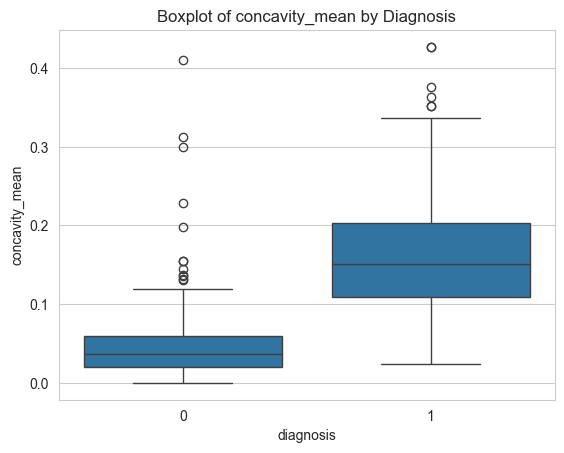

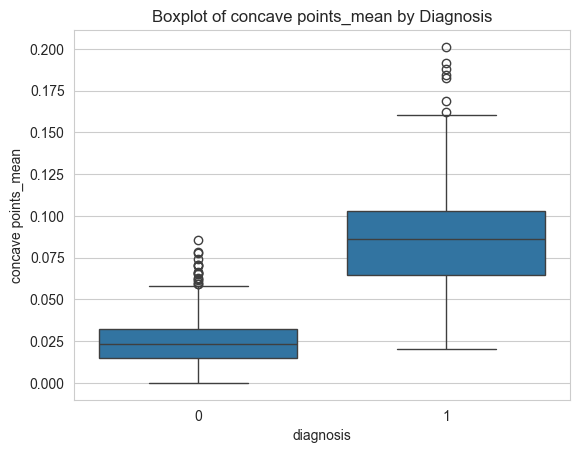

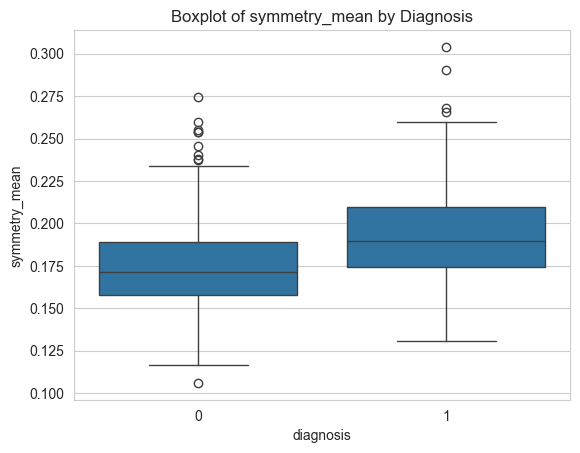

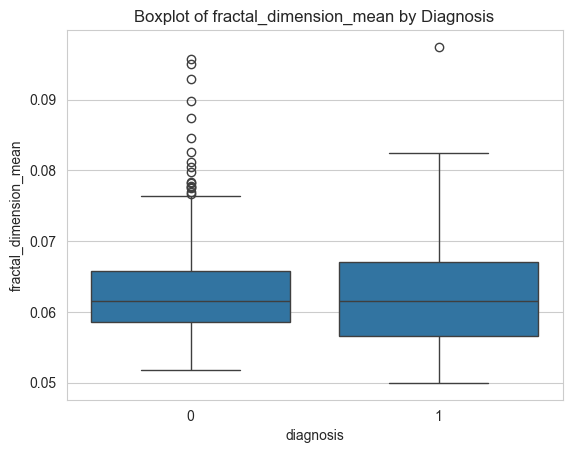

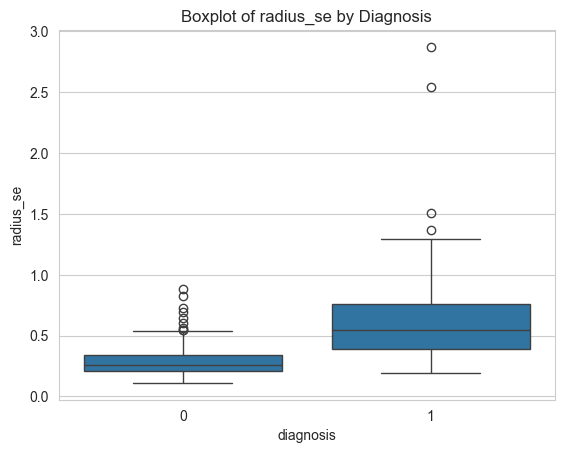

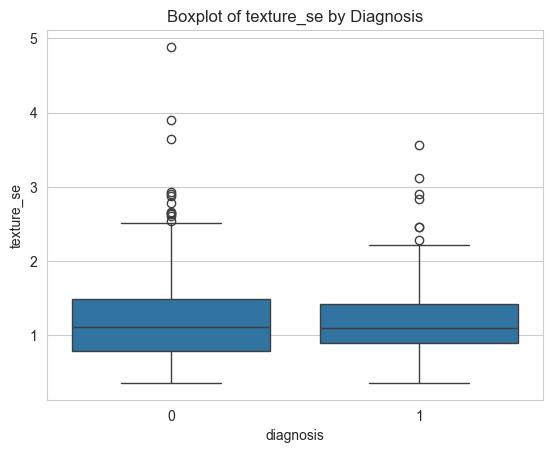

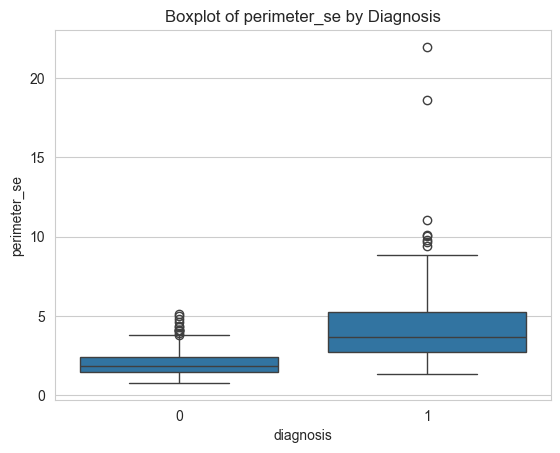

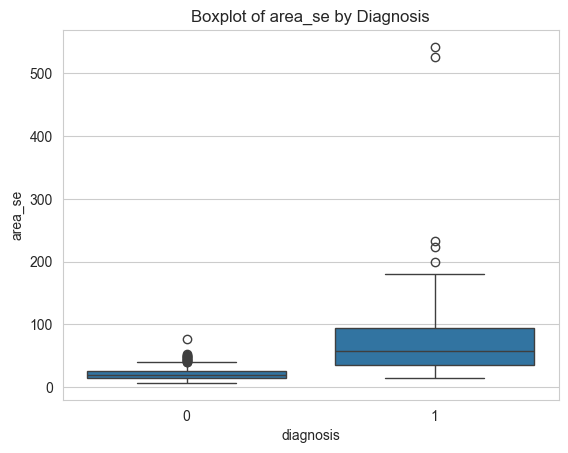

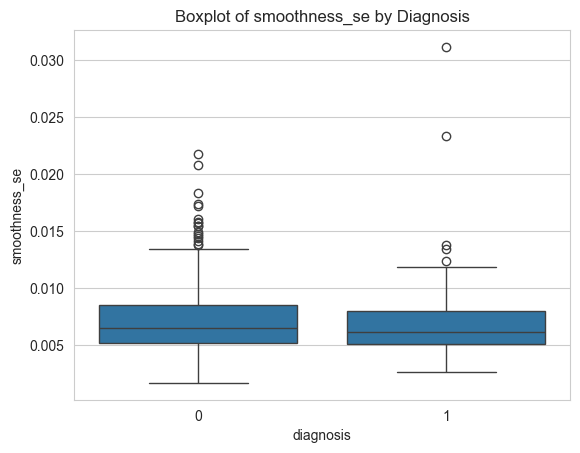

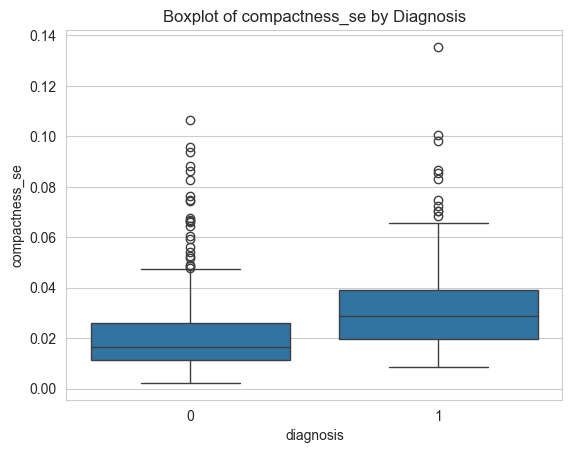

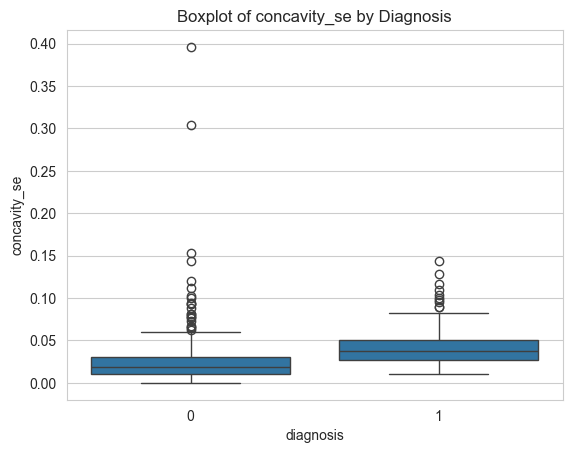

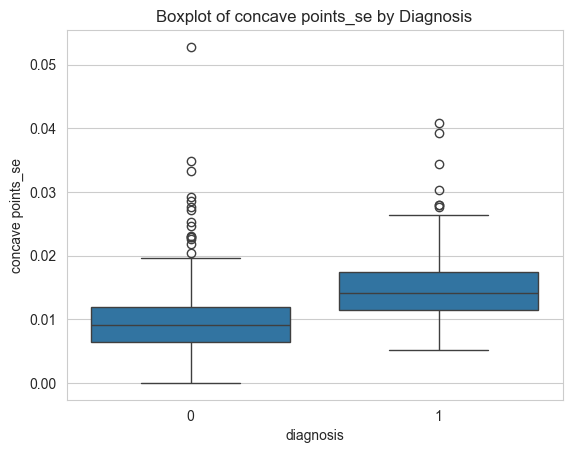

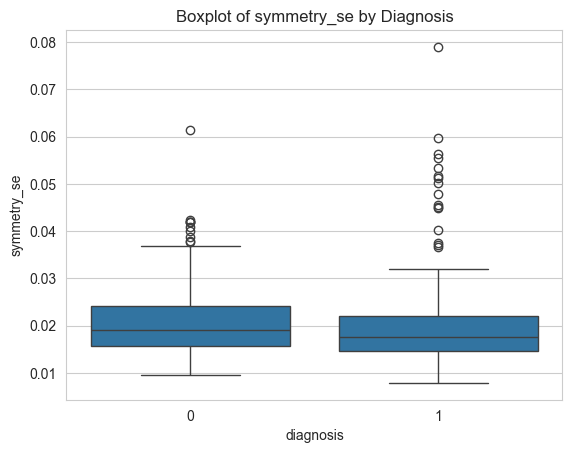

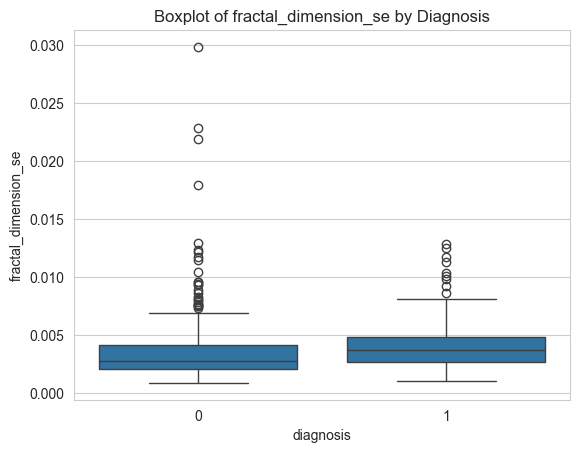

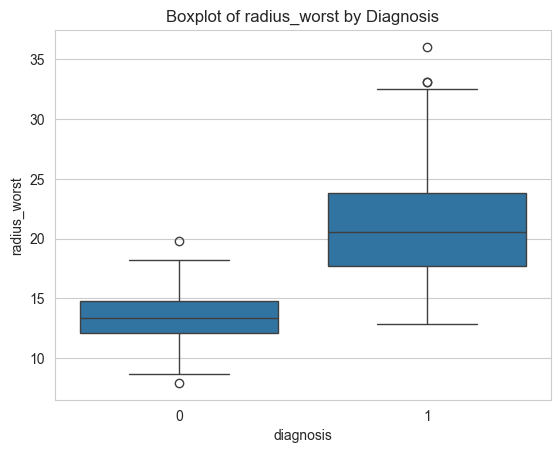

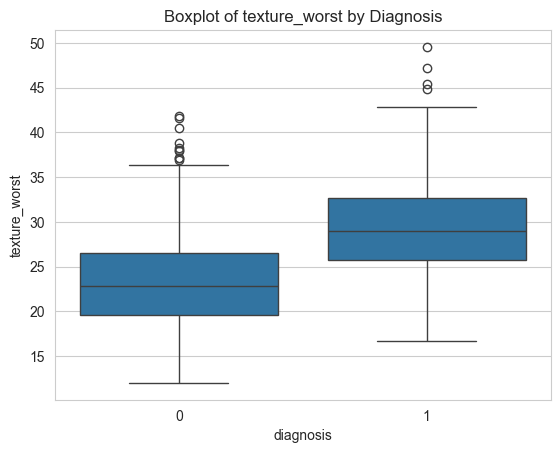

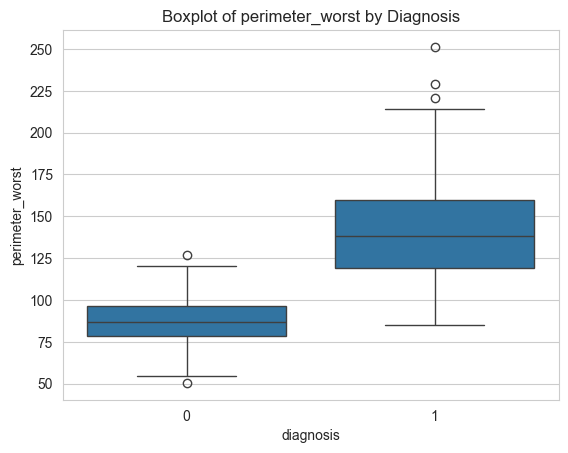

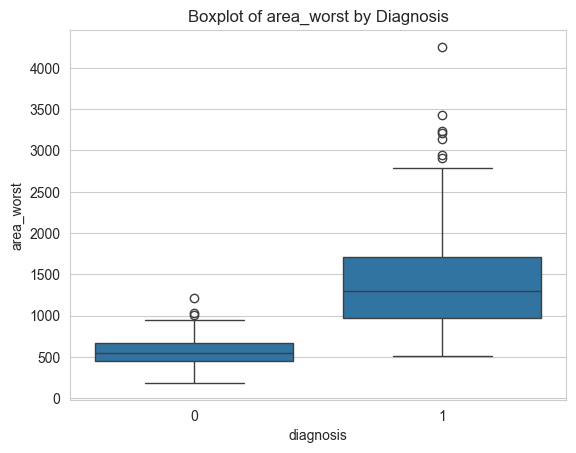

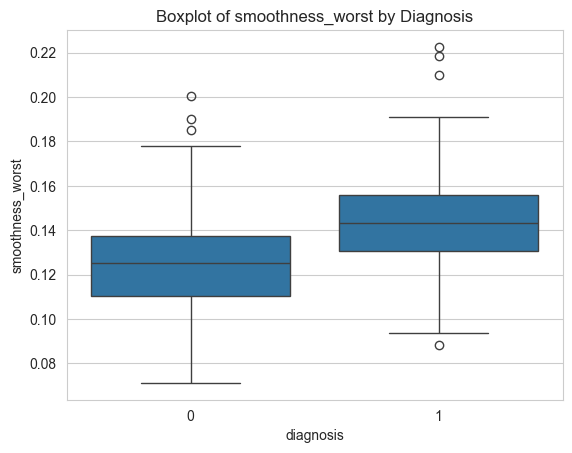

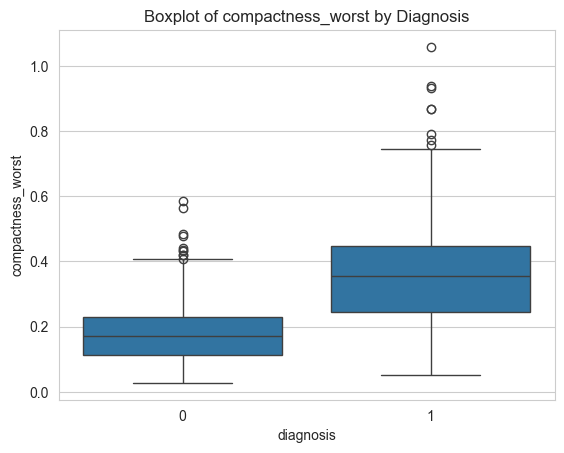

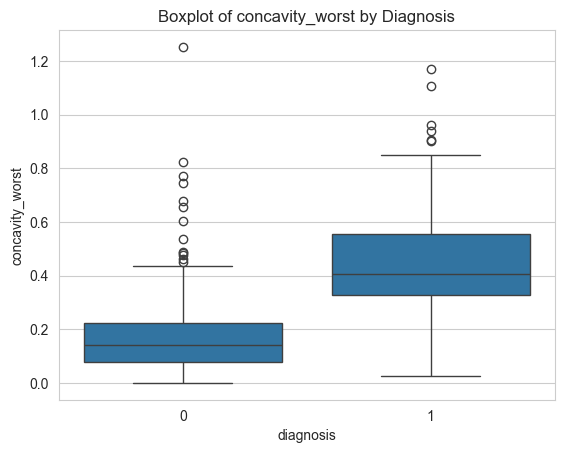

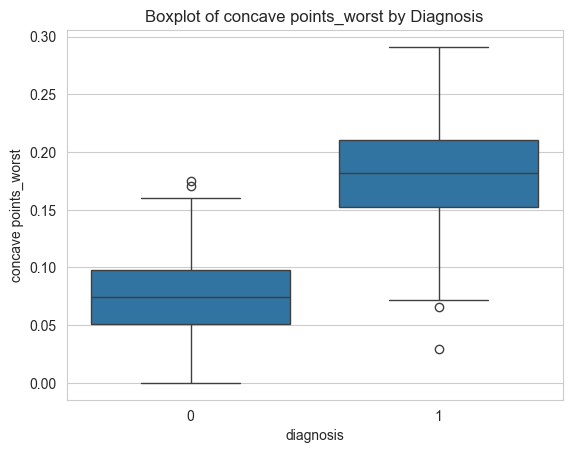

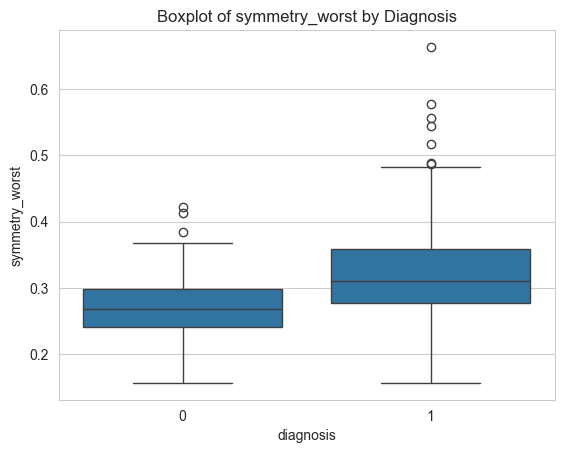

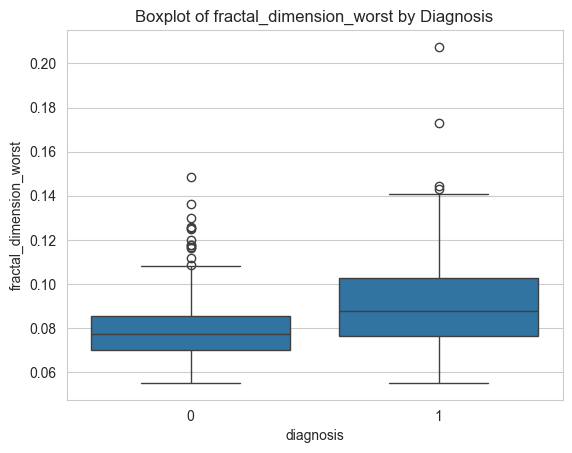

In [13]:
data.iloc[:, 2:].hist(figsize = (10, 8))
plt.tight_layout()
plt.show()

for col in data.columns[2: -1]:
    sns.boxplot(x = 'diagnosis', y = col, data = data)
    plt.title(f'Boxplot of {col} by Diagnosis')
    plt.show()

# 🔹 1. Plotting All Feature Distributions
    data.iloc[:, 2:] → selects all columns from index 2 to the end (includes features + target).

    .hist() → creates a histogram for each feature.

    figsize=(10, 8) → sets a comfortable size for all plots.

    plt.tight_layout() → avoids overlapping text or labels.

# 💬 What It Shows:
You’ll see how each feature is spread out.

Spot skewed distributions or outliers easily.

Helps decide whether scaling or transformation is needed.

# 🔹 2. Boxplots Comparing Each Feature by Diagnosis
Loops through all feature columns (skipping ID and diagnosis).

Draws a boxplot for each feature against the diagnosis:

    0 = Benign (non-cancerous)

    1 = Malignant (cancerous)

Boxplots show:

    Median

    Interquartile range

    Outliers

# 📊 Feature-wise Distribution by Diagnosis

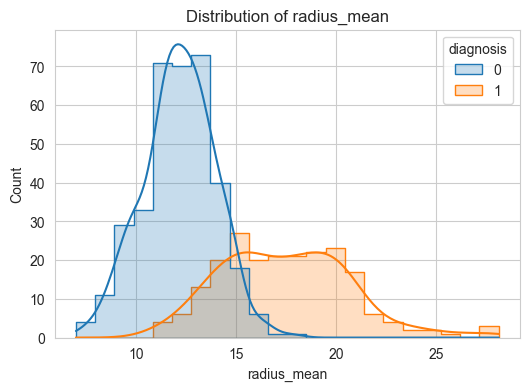

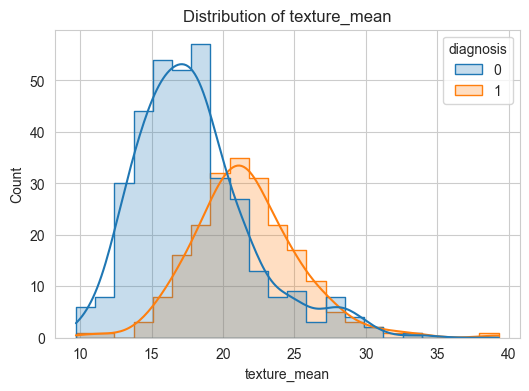

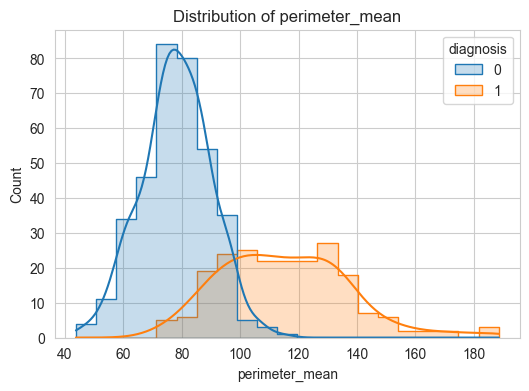

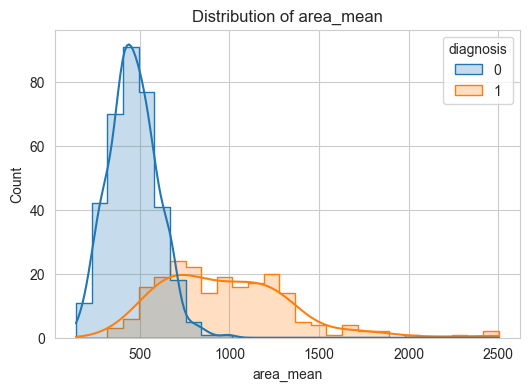

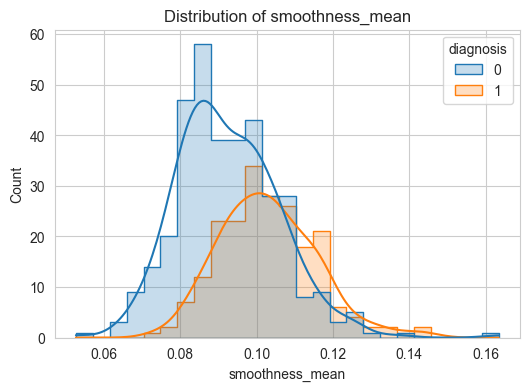

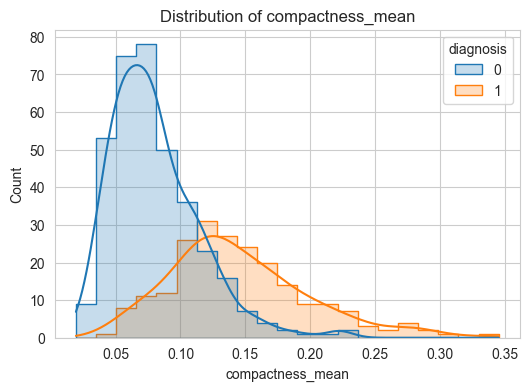

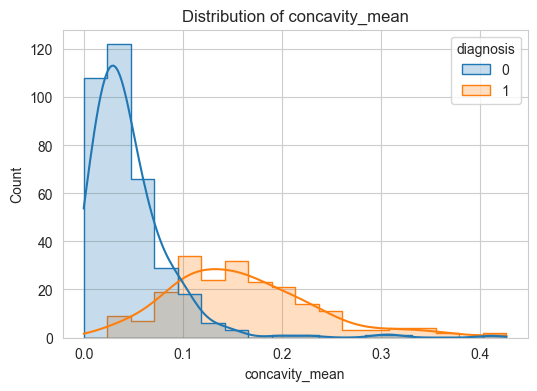

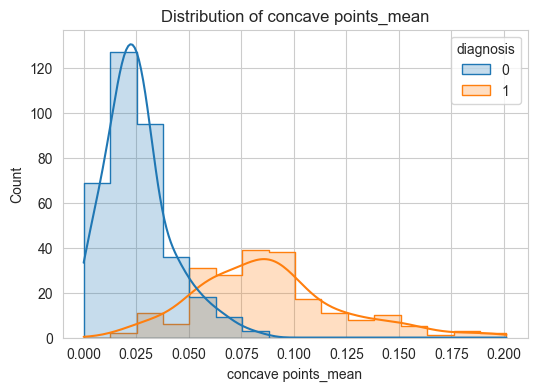

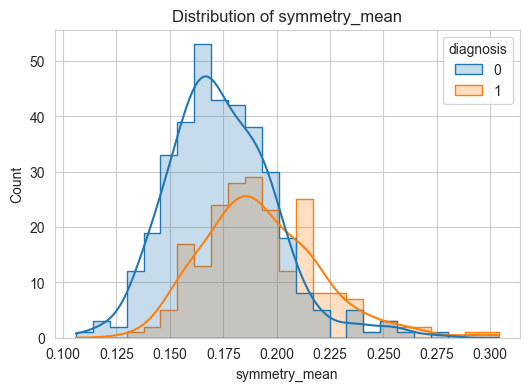

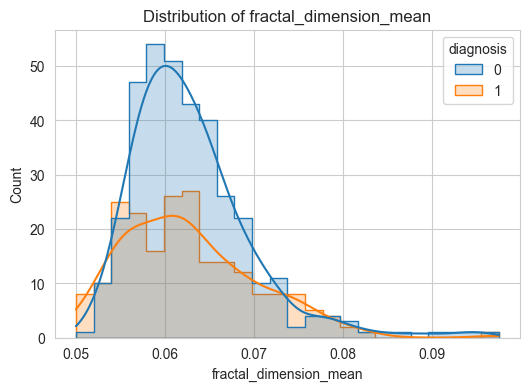

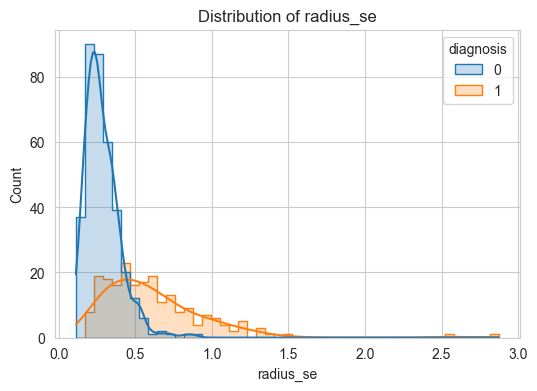

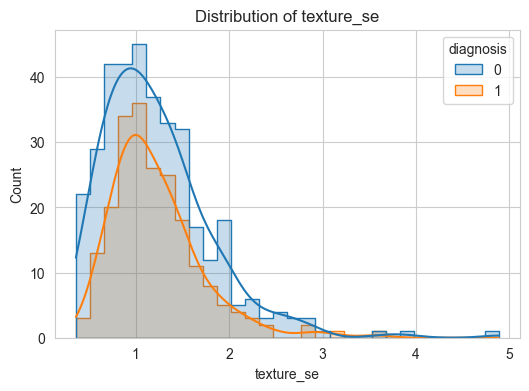

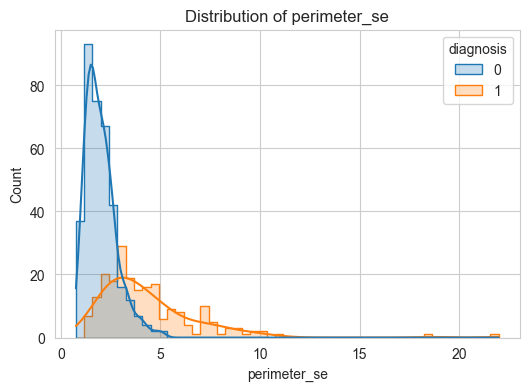

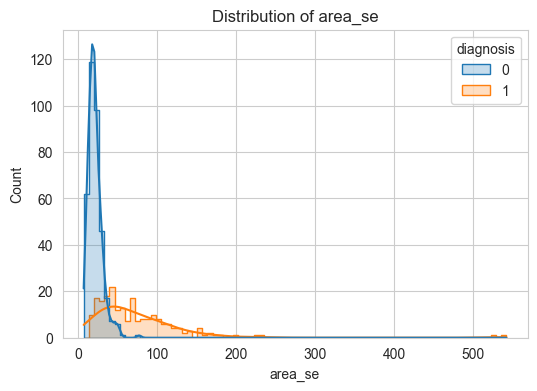

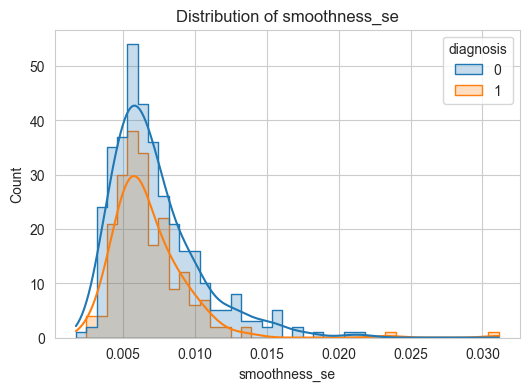

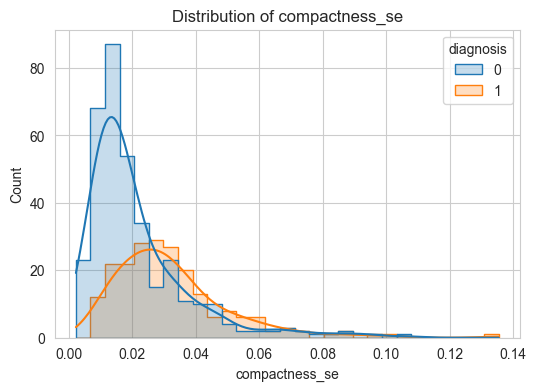

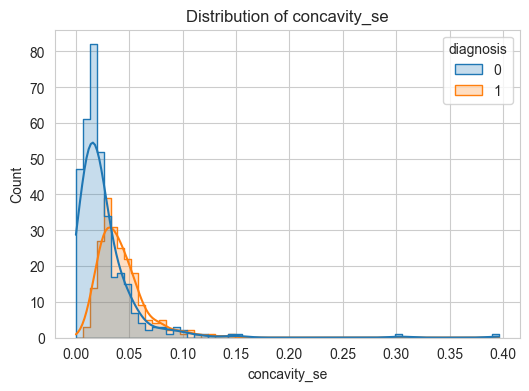

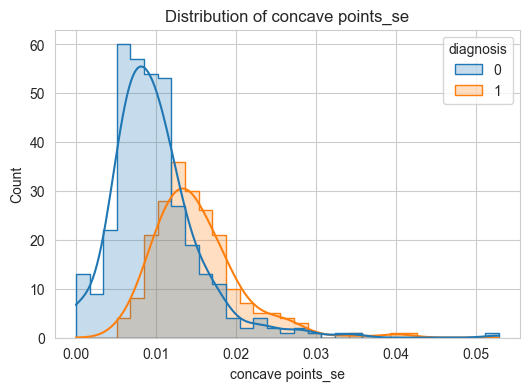

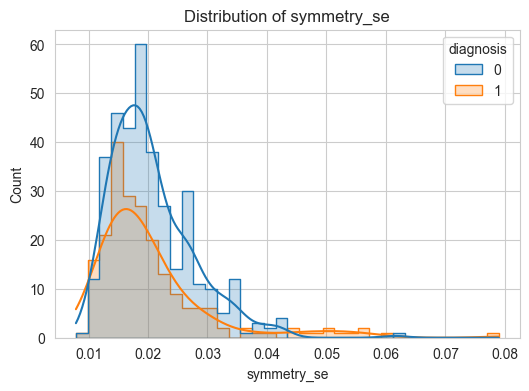

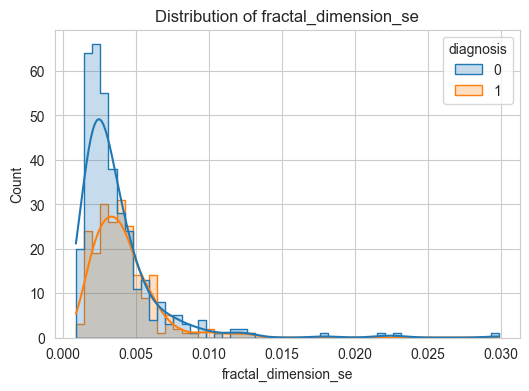

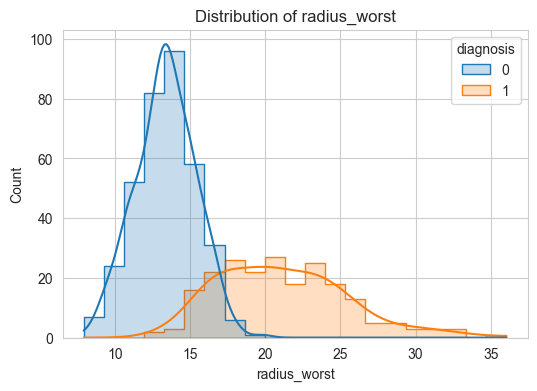

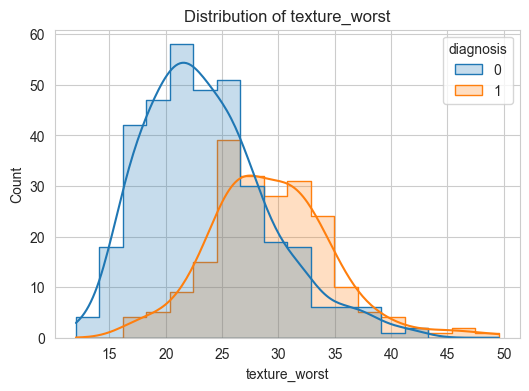

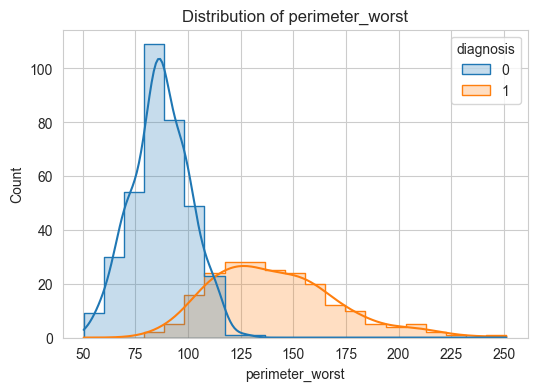

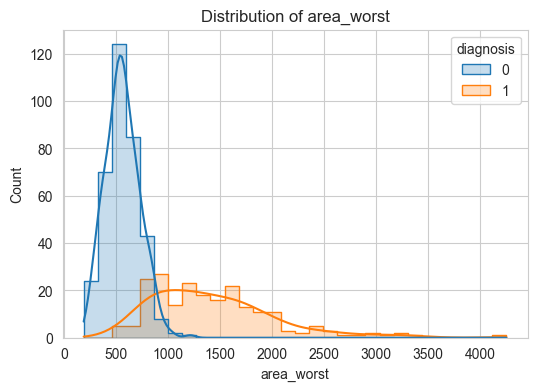

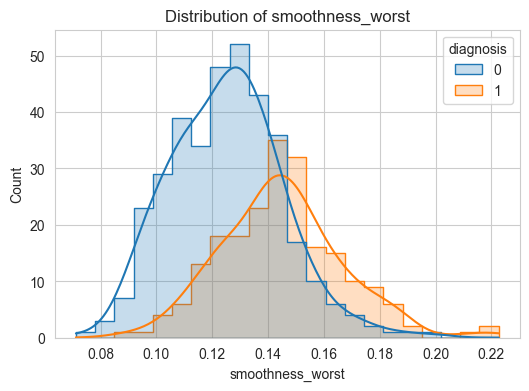

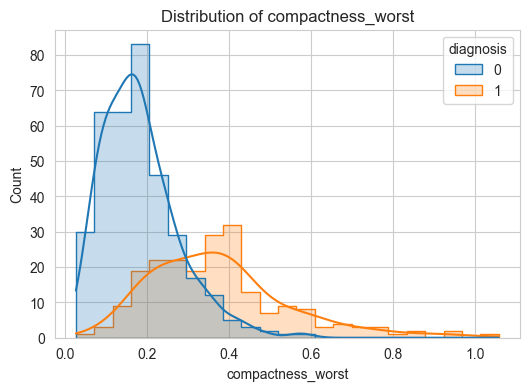

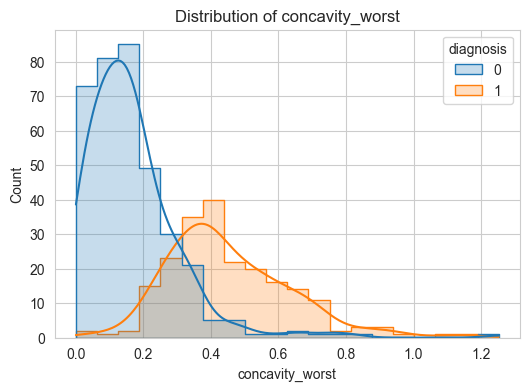

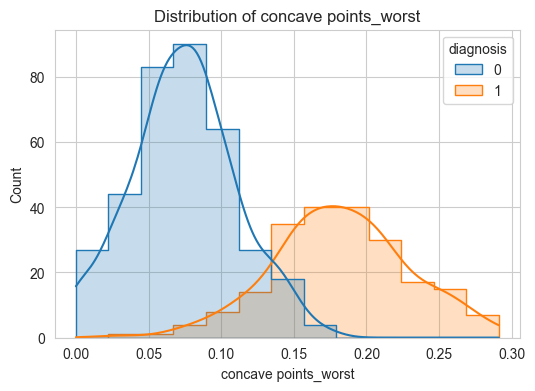

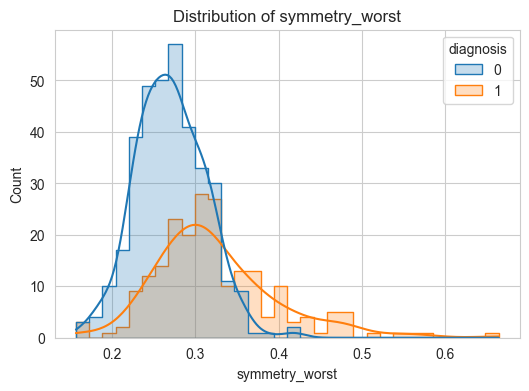

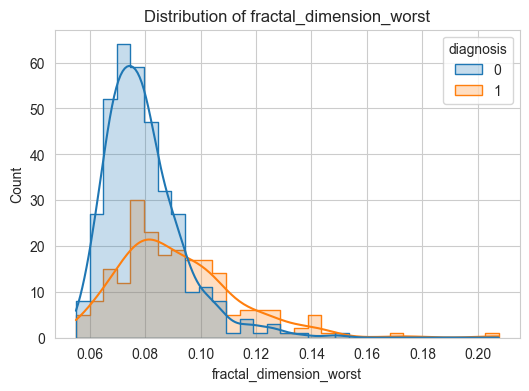

In [14]:
for column in data.columns[2:-1]:
    plt.figure(figsize=(6, 4))
    sns.histplot(data, x=column, hue='diagnosis', kde=True, element='step')  # Replace 'target' with actual column name
    plt.title(f'Distribution of {column}')
    plt.show()

for column in data.columns[2:-1]
Loops through all feature columns (skipping ID and diagnosis itself).

sns.histplot(..., hue='diagnosis', kde=True)

Plots the histogram of each feature.

Uses different colors for benign and malignant based on the diagnosis column.

Adds KDE curves to see the smooth shape of distributions.

element='step' gives it a clean stepped-line style.

plt.figure(figsize=(6, 4))
Keeps each plot compact but readable.

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [16]:
clf = LogisticRegression(max_iter=10000, random_state=42)
clf.fit(x_train, y_train)

C:\Users\durgarao\anaconda3\envs\Pandas\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=10000, random_state=42)

In [17]:
y_pred = clf.predict(x_test)

In [18]:
log = LogisticRegression(max_iter = 10000, random_state = 42)
log.fit(x_train, y_train)
log.score(x_train, y_train)

C:\Users\durgarao\anaconda3\envs\Pandas\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9626373626373627

In [19]:
y_pred = log.predict(x_test)
y_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1])

In [20]:
acc = accuracy_score(y_test,y_pred)
prec = precision_score(y_test,y_pred)
rec = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
conf = confusion_matrix(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)

print(f"Accuracy: {acc:4f}")
print(f"precision_score: {prec:4f}")
print(f"recall_score: {rec:4f}")
print(f"f1_score: {f1:4f})")
print("confusion_matrix:")
print(cm)

Accuracy: 0.956140
precision_score: 0.975000
recall_score: 0.906977
f1_score: 0.939759)
confusion_matrix:
[[70  1]
 [ 4 39]]


# KNN

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score

In [22]:
data = load_breast_cancer()
x = data.data
y = data.target

In [23]:
data = load_breast_cancer()
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]], shape=(569, 30)),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,

In [24]:
x,y = data.data,data.target
x_test,x_train,y_test,y_train = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [25]:
model = KNeighborsClassifier(n_neighbors = 5)
model.fit(x_train,y_train)

KNeighborsClassifier()

In [26]:
print("Accuracy:",model.score(x_test,y_test))

Accuracy: 0.9230769230769231


In [27]:
model.fit(x_train,y_train)
model.score(x_train,y_train)

0.9649122807017544

In [28]:
y_pred = model.predict(x_test)
y_pred

array([1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,

In [29]:
acc = accuracy_score(y_test,y_pred)
prec = precision_score(y_test,y_pred)
rec = recall_score(y_test,y_pred)
conf = confusion_matrix(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)

print(f"Accuracy: {acc:4f}")
print(f"Precision_score: {prec:4f}")
print(f"recall_score: {rec:4f}")
print(f"f1_score: {f1:4f}")
print("confusion_matrix:")
print(cm)

Accuracy: 0.923077
Precision_score: 0.919732
recall_score: 0.961538
f1_score: 0.939759
confusion_matrix:
[[145  24]
 [ 11 275]]


# k = 3

In [30]:
model = KNeighborsClassifier(n_neighbors = 3)
model.fit(x_train,y_train)
model.score(x_train,y_train)
y_pred = model.predict(x_test)
y_pred

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,

In [31]:
acc = accuracy_score(y_pred,y_pred)
prec = precision_score(y_test,y_pred)
rec = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
conf = confusion_matrix(y_test,y_pred)

print(f"Accuracy: {acc:4f}")
print(f"precision_score: {prec:4f}")
print(f"recall_score: {rec:4f}")
print(f"f1_score: {f1:4f}")
print("confusion_matrix:")
print(cm)

Accuracy: 1.000000
precision_score: 0.910596
recall_score: 0.961538
f1_score: 0.935374
confusion_matrix:
[[145  24]
 [ 11 275]]


# k = 4

In [32]:
model = KNeighborsClassifier(n_neighbors = 4)
model.fit(x_train,y_train)
model.score(x_train,y_train)
y_pred = model.predict(x_test)
y_pred

array([1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,

In [33]:
acc = accuracy_score(y_test,y_pred)
prec = precision_score(y_test,y_pred)
rec = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
conf = confusion_matrix(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)

print(f"Accuracy: {acc:4f}")
print(f"precision_score: {prec:4f}")
print(f"recall_score: {rec:4f}")
print(f"f1_score: {f1:4f}")
print("confusion_matrix:")
print(cm)

Accuracy: 0.920879
precision_score: 0.928082
recall_score: 0.947552
f1_score: 0.937716
confusion_matrix:
[[148  21]
 [ 15 271]]


In [34]:
model=KNeighborsClassifier(n_neighbors=5)
model.fit(x_train,y_train)
model.score(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,

In [35]:
acc = accuracy_score(y_test,y_pred)
prec = precision_score(y_test,y_pred)
rec = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
conf = confusion_matrix(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)

print(f"Accuracy: {acc:4f}")
print(f"precision_score: {prec:4f}")
print(f"recall_score: {rec:4f}")
print(f"f1_score: {f1:4f}")
print("confusion_matrix:")
print(cm)

Accuracy: 0.923077
precision_score: 0.919732
recall_score: 0.961538
f1_score: 0.940171
confusion_matrix:
[[145  24]
 [ 11 275]]


# NAIVE BAYES CLASSIFIER

In [36]:
data = load_breast_cancer()
x = data.data
y = data.target

In [37]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train,y_train)
gnb.score(x_train,y_train)

0.9736842105263158

In [38]:
data = load_breast_cancer()
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]], shape=(569, 30)),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,

In [40]:
gnb = GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB()

In [41]:
y_pred = gnb.predict(x_test)
y_pred

array([0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,

In [42]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix

In [43]:
acc=accuracy_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)
rec=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
cm=confusion_matrix(y_test,y_pred)

#print the results
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(cm)

Accuracy: 0.9231
Precision: 0.9373
Recall: 0.9406
F1 Score: 0.9389
Confusion Matrix:
[[151  18]
 [ 17 269]]


# SUPPORT VECTOR MACHINE(SVM)

In [44]:
from sklearn.svm import SVC
reg = SVC()
reg

SVC()

In [45]:
reg.fit(x_train,y_train)
reg.score(x_train,y_train)

0.9473684210526315

In [46]:
y_pred = reg.predict(x_test)
y_pred

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,

In [47]:
acc = accuracy_score(y_test,y_pred)
prec = precision_score(y_test,y_pred)
rec = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
conf = confusion_matrix(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)

print(f"Accuracy: {acc}")
print(f"precision: {prec}")
print(f"recall: {rec}")
print(f"f1_score: {f1}")
print(f"confusion_matrix:")
print(cm)

Accuracy: 0.8923076923076924
precision: 0.8691588785046729
recall: 0.9755244755244755
f1_score: 0.9192751235584844
confusion_matrix:
[[127  42]
 [  7 279]]


# DECISION TREE

In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

In [49]:
data = load_breast_cancer()
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]], shape=(569, 30)),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,

In [50]:
x,y = data.data,data.target
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [51]:
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [52]:
clf.score(x_train,y_train)

1.0

In [53]:
y_pred=clf.predict(x_test)
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0])

In [55]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
acc=accuracy_score(y_test,y_pred)
prec=precision_score(y_test,y_pred,average='macro')
rec=recall_score(y_test,y_pred,average='macro')
f1=f1_score(y_test,y_pred,average='macro')
cm=confusion_matrix(y_test,y_pred)

print(f" accuracy: {acc:.4f}")
print(f" Precision: {prec:.4f}")
print(f" Recall: {rec:.4f}")
print(f" F1 Score: {f1:.4f}")
print(cm)

 accuracy: 0.9386
 Precision: 0.9331
 Recall: 0.9369
 F1 Score: 0.9349
[[40  3]
 [ 4 67]]


# RANDOM FOREST

In [56]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [57]:
clf.score(x_train,y_train)


1.0

In [58]:
y_pred=clf.predict(x_test)
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0])

In [59]:
acc=accuracy_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)
rec=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
cm=confusion_matrix(y_test,y_pred)

#print the results
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(cm)

Accuracy: 0.9386
Precision: 0.9571
Recall: 0.9437
F1 Score: 0.9504
Confusion Matrix:
[[40  3]
 [ 4 67]]


C:\Users\durgarao\AppData\Local\Temp\ipykernel_13932\1316965673.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='Model', y='Accuracy', data=df, palette='viridis')


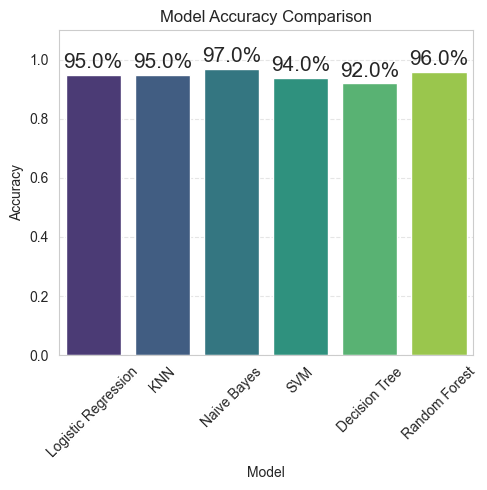

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

d = {
    'Model': ['Logistic Regression', 'KNN', 'Naive Bayes', 'SVM', 'Decision Tree', 'Random Forest'],
    'Accuracy': [0.95, 0.95, 0.97, 0.94, 0.92, 0.96]
}

df = pd.DataFrame(d)


plt.figure(figsize=(5, 5))
barplot = sns.barplot(x='Model', y='Accuracy', data=df, palette='viridis')

for i, bar in enumerate(barplot.patches):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.01,  # slightly above the bar
        f'{height * 100:.1f}%',  # format as percentage
        ha='center',
        va='bottom',
        fontsize=15
    )

plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1.1)  # increased limit to accommodate text
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

The bar plot will display the accuracy of each model on the test data, allowing you to easily compare their performances.

Based on the dataset and models, you will likely see that Naive Bayes and Random Forest tend to perform well, while SVM and Decision Tree might have slightly lower accuracy.